### AMHARIC FAKE NEWS DETECTION

In [1]:
import numpy as np # linear algebra
import pandas as pd #data processing 
from sklearn import metrics
from sklearn import *
import csv, random, numpy, os, re, nltk, scipy
from sklearn import svm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack,vstack
import pickle
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import sparse
import re
import seaborn as sb
import nltk
import string
from wordcloud import WordCloud
from nltk import wordnet
#nltk.download('wordnet')
import importlib


In [3]:
train=pd.read_csv('TrainTestfeature.csv',encoding='utf-8',engine='python', error_bad_lines=False)
tes=pd.read_csv('tes.csv',encoding='utf-8',engine='python', error_bad_lines=False)

In [4]:
tes.tail(10)

id   author                                            article  \
590  2408      ቲኪቫ  የኢትዮጵያ ብሄራዊ ምርጫ ቦርድ ሰብሳቢ ወይዘሪት ብርቱካን ሚደቅሳ በንፋስ...   
591  2673     ብልፅግ  ሰበር ዜና የመከላከያ ሚኒስትሩ አቶ ለማ መገርሳ ከፌዴሬሽን ምክር ቤት አ...   
592  2236      አምባ  ዛምቢያን ከነጻነት ማግሥት አንስቶ ለ27 ዓመታት የመሩት ፕሬዝዳንት ኬኔት...   
593    85       ዘሀ                የፖለቲካ ቁማር በጠ/ሚ/ር ዶ/ር አብይ አህመድ አንደበት   
594  2581       ቮት  እጅግ አስደሳች ሰበር ዜና ጀግኖቹ ታሪክ ሰሩ ጌታቸው አሰፋን ከጥልቅ ከዋ...   
595   447   አፋርሚዲያ  ብሄራዊ ባንክ በወር ማውጣት የሚቻለው የገንዘብ መጠን ላይ ጥሎት የነበረው...   
596  2712      ስዩም  አይ ወያኔ የጃዋርና ዳውድ ኢብሳን አምሳል ዓለምአቀፍ የምርጫ ታዛቢ ብላ ...   
597   462   አፋርሚዲያ   በኢትዮጵያ ሱማሌ ክልል ደግሃብር ከተማ ላይ ህዝባዊ የተቃውሞ ሰልፍ እየ...   
598   856  ናትናኤልመኮ   ከትግራይ ክልል ርዕሰ መስተዳድር ጽህፈት ቤት እና ሰማእታት ሃዉልት አቅ...   
599  2686     ብልፅግ  ሰበር ዜና  በትግራይ ፈንቅል ህውሃት ንቅናቄ ተቀጣጠለ😈 በትግራይ የህውሃ...   

                                              headline  label  
590  የኢትዮጵያ ብሄራዊ ምርጫ ቦርድ ሰብሳቢ ወይዘሪት ብርቱካን ሚደቅሳ በንፋስ...      1  
591  ሰበር ዜና የመከላከያ ሚኒስትሩ አቶ ለማ መገርሳ ከፌዴሬሽን ምክር ቤት አ...      1  
592                             ኬኔት ካውንዳ በ97 ዓመታቸው አረፉ      1  
593                  ሹክሹክታ ተለቋል:: ዩቱብ ቻናላችን ላይ ያገኙታል::      0  
594                                                NaN      0  
595  ብሄራዊ ባንክ በወር ማውጣት የሚቻለው የገንዘብ መጠን ላይ ጥሎት የነበረው...      1  
596  አይ ወያኔ የጃዋርና ዳውድ ኢብሳን አምሳል ዓለምአቀፍ የምርጫ ታዛቢ ብላ ...      0  
597                   ሰበር ዜና በህወሓት አቋም የተቃውሞ ሰልፍ ተደረገ       1  
598  የሀገር መከላከያ ሰራዊትና የፌደራል ፓሊስ ድምጸ ወያነ ሲጠቀምበት የነበረ...      1  
599                  ሰበር ዜና በትግራይ ፈንቅል ህውሃት ንቅናቄ ተቀጣጠለ      0

In [5]:
train=train.sample(frac=1) #frac=1
tes=tes.sample(frac=1)

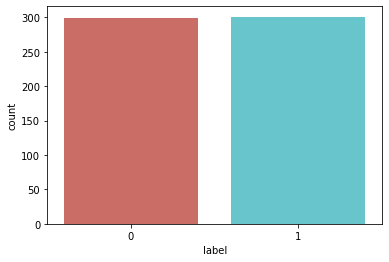

In [6]:
def create_distribution(dataFile):
    return sb.countplot(x='label',data=dataFile,palette='hls')
create_distribution(tes)

In [7]:
x = train[['id','author','article','headline']]
y = train['label']
tesx=tes[['id','author','article','headline']]
tesy=tes['label']


In [8]:
X_train,X_test,Y_train,Y_test  = train_test_split(x,y, test_size = 0.2, random_state=14)

In [9]:
#X_train.to_csv('tes3')

In [10]:
print(X_train.shape, tesx.shape)

(2400, 4) (600, 4)


In [11]:
print(X_train.isnull().sum())
print('************')
print(tesx.isnull().sum())

id            0
author        0
article       0
headline    474
dtype: int64
************
id            0
author        0
article       0
headline    121
dtype: int64


In [12]:
X_test = X_test[['author','article','headline']]

In [13]:
X_train=X_train.fillna(' ')
tesx=tesx.fillna(' ')

In [14]:
print(Y_train.isnull().sum())
print('************')
print(tesy.isnull().sum())

0
************
0


In [15]:
Y_train.value_counts()

1    1217
0    1183
Name: label, dtype: int64

In [16]:
tesy.value_counts()

1    301
0    299
Name: label, dtype: int64

In [17]:
for index,row in X_train.iterrows():
    
    head = row['headline']
    arti = row['article']
    head = re.sub(r'[^\w\s]','',head)
    arti = re.sub(r'[^\w\s]','',arti)
    head = re.sub('https?://\S+|www\.\S+','',head)
    arti = re.sub('https?://\S+|www\.\S+','',arti)
    head = re.sub('፠፡።፣፤፥፦፧፨“”‘’…‹‹››·•"#$%^&@~`;♦️-!*👉😂👇❗','',head)
    arti = re.sub('፠፡።፣፤፥፦፧፨“”‘’…‹‹››·•"#$%^&@~`;♦️-!*👉😂👇❗','',arti)
    head = re.sub('፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻፼','',head)
    arti = re.sub('፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻፼','',arti)
    head = re.sub(r'\d+','',head)
    arti = re.sub(r'\d+','',arti)
    head = re.sub(r'[a-zA-Z0-9]+','',head)
    arti = re.sub(r'[a-zA-Z0-9]+','',arti)
    X_train.loc[index,'headline'] = head
    X_train.loc[index,'article'] = arti

In [18]:
simmilar_characters = {"ሐ":"ሀ","ሑ":"ሁ","ሒ":"ሂ","ሓ":"ሃ","ሔ":"ሄ","ሕ":"ህ","ሖ":"ሆ",\
                       "ኀ":"ሀ","ኁ":"ሁ","ኂ":"ሂ","ኃ":"ሃ","ኄ":"ሄ","ኅ":"ህ","ኆ":"ሆ",\
                       "ሠ":"ሰ","ሡ":"ሱ","ሢ":"ሲ","ሣ":"ሳ","ሤ":"ሴ","ሥ":"ስ","ሦ":"ሶ","ሧ":"ሷ",\
                       "ዐ":"አ","ዑ":"ኡ","ዒ":"ኢ","ዓ":"ኣ","ዔ":"ኤ","ዕ":"እ","ዖ":"ኦ",\
                       "ጸ":"ፀ","ጹ":"ፁ","ጺ":"ፂ","ጻ":"ፃ","ጼ":"ፄ","ጽ":"ፅ","ጾ":"ፆ"}

In [19]:
for index,row in X_train.iterrows():
    
    head = row['headline']
    arti = row['article']
    strss="".join((simmilar_characters.get(x,x) for x in head))
    strsss="".join((simmilar_characters.get(x,x) for x in arti))
    X_train.loc[index,'headline'] = strss
    X_train.loc[index,'article'] = strsss

In [20]:
for index,row in tesx.iterrows():
    
    head = row['headline']
    arti = row['article']
    head = re.sub(r'[^\w\s]','',head)
    arti = re.sub(r'[^\w\s]','',arti)
    head = re.sub('https?://\S+|www\.\S+','',head)
    arti = re.sub('https?://\S+|www\.\S+','',arti)
    head = re.sub('፠፡።፣፤፥፦፧፨“”‘’…‹‹››·•"#$%^&@~`;♦️-!*👉😂👇❗','',head)
    arti = re.sub('፠፡።፣፤፥፦፧፨“”‘’…‹‹››·•"#$%^&@~`;♦️-!*👉😂👇❗','',arti)
    head = re.sub('፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻፼','',head)
    arti = re.sub('፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻፼','',arti)
    head = re.sub(r'\d+','',head)
    arti = re.sub(r'\d+','',arti)
    head = re.sub(r'[a-zA-Z0-9]+','',head)
    arti = re.sub(r'[a-zA-Z0-9]+','',arti)
    tesx.loc[index,'headline'] = head
    tesx.loc[index,'article'] = arti

In [21]:
for index,row in tesx.iterrows():
    
    head = row['headline']
    arti = row['article']
    strss="".join((simmilar_characters.get(x,x) for x in head))
    strsss="".join((simmilar_characters.get(x,x) for x in arti))
    tesx.loc[index,'headline'] = strss
    tesx.loc[index,'article'] = strsss

In [22]:
X_test.tail(11)

author                                            article  \
2307     ምስለዜና  ሰበር ዜና ትግራይ ለመገንጠል ጫፍ ለይ ደርሳለች… ህውሃት ግልፅ አቋሙን ...   
2640     ጉማሰገታ  ፖለቲካ አታድርጉበአንድ መኪና ሀያ ወጣት ሰላሳ ልሙጥ ባንዲራ ይዞ እያውለ...   
709    አምባዲጂታል  የሶማሊ ክልል ኮሚኒኬሽን ቢሮ በፌስቡክ ገጹ እንዳሠፈረው ከሰሞኑ በሁለቱ ...   
2360   አምባዲጂታል  የምርጫ መረጃ  በደቡብ ክልል ኡባ ደብረ ፀሐይ በሚገኝ የምርጫ ጣቢያ የም...   
303      ሊክድዜና  በቤንሻንጉል ጉሙዝ በጅምላ የተጨፈጨፉትን አማሮች ጉዳይ በተመለከተ በአማራ...   
403   ኤሊያስመሰረት  የፍትሕ መጽሔት ማኔጂንግ ዳይሬክተር ተመስገን ደሳለኝ እና የመጽሔቱ ዋና ...   
2155   ብልፅግናዜና  በሻሸመኔ ኦነግ ሸኔ የቦምብ ጥቃት ፈጸመ ታጣቂው በመከላከያ ሰራዊት በተወ...   
2231   አምባዲጂታል  በሳዑዲ ዐረቢያ የሚገኙ ኢትዮጵያውያን ስደተኞች መብት እንዲበር ለመምከር ...   
1379    ግእዝሚዲያ   የትግራይ ጊዚያዊአስተዳድር ለጁንታ ሹመኞች ደሞዝ እየከፈሉ ጁንታው እያደ...   
1634    ኢቲዮሚዲያ  የአሜሪካ መንግስት በኢትዮጵያ የመንግስት የስራ ሀላፊዎች ላይ የጣለውን የ...   
2259     ምስለዜና   አቶ ለማ መገርሳ ይቅርታ መጠየቃቸው ተነገረ መንግስት ስለ ሽመልስ ንግግ...   

                                               headline  
2307                                                NaN  
2640  ከአማራ ክልል ወሎን ከአንበጣ ለመከላከል የተንቀሳቀሱት ወጣቶች ጅምራቸው ...  
709   በሶማሊ እና አፋር ክልል አዋሳኝ አካባቢ በተፈጠረ ግጭት የ27 ሰዎች ሕይ...  
2360  የምርጫ መረጃ  በደቡብ ክልል ኡባ ደብረ ፀሐይ በሚገኝ የምርጫ ጣቢያ የም...  
303                                          ጭቅጨቅተፈጥሯል   
403   የፍትሕ መጽሔት ማኔጂንግ ዳይሬክተር ተመስገን ደሳለኝ እና የመጽሔቱ ዋና ...  
2155                                                NaN  
2231  በሳኡዲ የሚገኙ ኢትዮጵያውያን መብት እንዲከበር ለመምከር ኢትዮጵያ ልኡክ ላከች  
1379              መንግስት የጁንታ ሹመኞች እና ታጣቂ ደሞዝ እየከፈለ ነው    
1634                   ሰበር ዜና ማንከማን ያንሳል እኛም ዕገዳ እንጥላለን  
2259                                                NaN

In [23]:
from nltk.corpus import stopwords
stop_words=stopwords.words('amharic')


print(stop_words)

['የሆኑትን', 'እስከ ', 'ይኸኛው ', 'ወይም', 'ሆነ', 'በሆኑ', 'ምንም ', 'ብሎ ', 'ከርሱ', 'እንደሆነ ', 'በኊላ ', 'በሆነው  ', 'መሆኑን ', 'ላይ ', 'በአንድ ', 'እንደዚህ ', 'ስለ ', 'የሚሆኑ ', 'ለዚያው ', 'ማንም ', 'የሆኑ ', 'በመሆን ', 'ይሁን ', 'ላይም ', 'ለዚሁ ', 'በማይበልጥ ', 'ከአስራ ', 'የሌለው ', 'ከዚሁ ', 'የሆናል ', 'ለእነርሱም ', 'መሰረት ', 'የሆነውን ', 'በማለት ', 'በእነዚህ ', 'ከነዚህ ', 'እዚሁ ', 'ሁኔታ ', 'ከላይ ', 'ባለ ', 'ያህል ', 'ቢሆንም ', 'ሌላ ', 'ሁሉ ', 'ይህንን', 'ነበር', 'ሁለት', 'ሶስት', 'አራት', 'አምስት', 'ስድስት', 'ሰባት', 'ስምንት ', 'ዘጠኝ', 'ይጠበቃል', 'አስታውቀዋል', 'ግን', 'ብለዋል', 'ዶር', 'አብይ', 'ቤት ', 'ከሆነና  ', 'መሆኑ ', 'እስከ ', 'ይሆናል ', 'ሌላውን ', 'ሌላው ', 'በእያንዳንዱ ', 'ለሆኑት ', 'ሆኖ ', 'ከሰባት ', 'የሚሆነው ', 'ጊዜም ', 'አለው ', 'ይህን', 'መንግስት', 'ተናግረዋል', 'ለሌላ ', 'በአንዱ ', 'አስከ ', 'እነዚሁ ', 'በዚህ ', 'አለበት ', 'አይሆንም ', 'የሌሎች ', 'እንደሆኑ ', 'እስከ ', 'ሲል ', 'ማለት ', 'የሚሆኑት ', 'ስለማናቸውም ', 'ውስጥ ', 'ይሆናሉ ', 'ሲባል ', 'ከሆነው ', 'ስለዚሁ ', 'ከአንድ ', 'ያልሆነ ', 'ሳለ ', 'የነበረውን ', 'ከአንዳንድ ', 'በማናቸውም ', 'በሙሉ ', 'የሆነው ', 'ያሉ ', 'በእነዚሁ ', 'ወር ', 'አስራ ', 'መሆናቸው ', 'ከሌሎች ', 'በአምስት ', 'ከአምስት ', 'አስር ', 'በዋና ', 'አንዲት ', 'ወይም ', 'በላይ ', 'እን

In [24]:
for index,row in X_train.iterrows():
    filter_sentence = ''
    
    sentence = row['headline']
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]
    filter_sentence=" ".join(words)
        
    X_train.loc[index,'headline'] = filter_sentence

In [25]:
for index,row in X_train.iterrows():
    filter_sentence = ''
    
    sentence = row['article']
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]
    filter_sentence=" ".join(words)
        
    X_train.loc[index,'article'] = filter_sentence

In [26]:
for index,row in X_train.iterrows():
    filter_sentence = ''
    
    sentence = row['author']
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]
    filter_sentence=" ".join(words)
        
    X_train.loc[index,'author'] = filter_sentence

In [27]:
X_train.head(10)

id     author                                            article  \
219    220   እንደወረደዜና  ከድምፃዊ ሃጫሉ ሁንዴሳ የአስከሬን ሽኝት መስተጓጎልና ከአንድ የፖሊስ አባ...   
1461  1462  ባላምባራስነጋሽ  ሱዳን በርካታ ለም መሬቴን በእጅ አድርጊያለሁ እያለች የሰፈር አውደልዳዩ ...   
1074  1075     ሳዱላከሚሴ  በአማራ ክልል አካባቢዎች ማለትም በጭልጋበገደብየበትክል ዲንጋ ሙስሊሞች እ...   
2202  2203    ብልፅግናዜና  ታዬ ደንደአ ለጃል መሮ መልስ ሰጡ የቪኦኤ ጋዜጠኛ ፅዮን በክፍል ከጃል መ...   
886    887    ቢቢሲአማርኛ  ይህንንም በተመለከተ አምባሳደር ሬድዋን በሰጡት ማብራሪያ ከተባበሩት መንግ...   
2184  2185    ብልፅግናዜና  ሰበር መረጃ ጃዋር ከባድ ጉድ ወጣበት የባልስልጣናትን ስልክ ይጠልፍ ተባለ...   
1084  1085   ሙሉቀንተስፋዉ  በከባድ መሳሪያ የታገዘው ጥቃት በነ ሽመልስ አብዲሳ አዝማችነት ህወሃትን ...   
492    493      ባቲፖስት  ገና ከሳምንታት በፊት አንበጣው እንደዚህ ሳይራባ ስንጮህ የቀድሞው ጠሚንስ...   
1979  1980    ብልፅግናዜና  አስደሳች መረጃ የኢትዮጵያ አየር ሃይል ለግብፅ እራስ ምታት ሆኗል የገዛቸ...   
1600  1601       በቃቄሮ  ብርሃኑ ነጋ የአቅሙን ስልጣን እስኪይዝ ድረስ ከኢትዮጵያ ብሄራዊ ባንክ ከ...   

                                               headline  
219   ከድምፃዊ ሃጫሉ ሁንዴሳ የአስከሬን ሽኝት መስተጓጎልና ከአንድ የፖሊስ አባ...  
1461                                                     
1074                    በአማራ ክልል በከተሞች ሙስሊሞች ይልቀቁ እየተባለ  
2202                                                     
886   ከተባበሩት መንግስታት ድርጅት የተደረሰው ስምምነት የሚደረጉት የእርዳታ አ...  
2184                                                     
1084    በአጣዬ በኩል የተቀሰቀሰው ንፁሃንን የማጥቃት ዘመቻ የኦነግ ማለት አይቻልም  
492       የአንበጣ መንጋ በሰብል ምርቶች ከፍተኛ የሆነ ውድመትን እያደረሰ ይገኛል  
1979                                                     
1600  ባለፉት አመታት ከውጪ የሚመጣ እርዳታና ከኦሮምያና ደቡብ ኢትዮጵያ በተዘረ...

In [28]:
for index,row in tesx.iterrows():
    filter_sentence = ''
    
    sentence = row['headline']
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]
    filter_sentence=" ".join(words)
        
    tesx.loc[index,'headline'] = filter_sentence

In [29]:
for index,row in tesx.iterrows():
    filter_sentence = ''
    
    sentence = row['article']
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]
    filter_sentence=" ".join(words)
        
    tesx.loc[index,'article'] = filter_sentence

In [30]:

    
real_words = ''
fake_words = ''
#stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in  X_train[Y_train==1].article: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
      
    real_words += " ".join(tokens)+" "

for val in  X_train[Y_train==0].article: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
      
    fake_words += " ".join(tokens)+" "

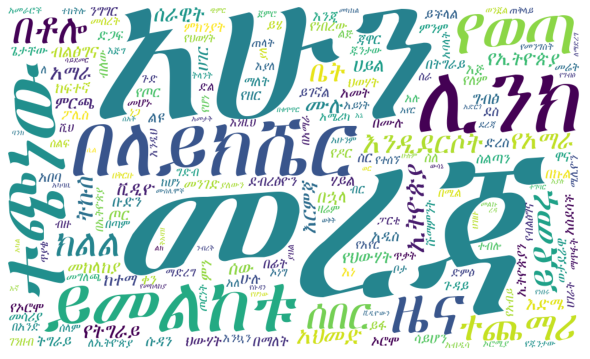

In [31]:
wordcloud = WordCloud(font_path='fonts\jiretsl.ttf',
                      relative_scaling = 1,
                      min_font_size=1,
                      background_color="white",
                      width=500,
                      height=300,
                      scale=2,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(fake_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
#uncoment to save the image
#plt.savefig('examples\\am_book.png',dpi=600)

In [32]:
real_wo = []
sentence=[] 
counta=[]
real_wors=[]
# iterate through the csv file 
for val in X_train.author: 
    wordl=(val.split())
    sentence.append(wordl) 

     
for w in sentence:
    real_wo.append((sentence.count(w)))
real_wors=np.array(real_wo)
newarr = real_wors.reshape(2400,1)
sentence


[['እንደወረደዜና'],
 ['ባላምባራስነጋሽ'],
 ['ሳዱላከሚሴ'],
 ['ብልፅግናዜና'],
 ['ቢቢሲአማርኛ'],
 ['ብልፅግናዜና'],
 ['ሙሉቀንተስፋዉ'],
 ['ባቲፖስት'],
 ['ብልፅግናዜና'],
 ['በቃቄሮ'],
 ['ሙክታሮቪች'],
 ['ቢቢሲአማርኛ'],
 ['ዳጉቲዩብ'],
 ['ቲኪቫኢትዮጵያ'],
 ['ምስለዜና'],
 ['ኢትዮጵያንኢንሳይደር'],
 ['ጉማሰገታ'],
 ['ቢቢሲአማርኛ'],
 ['ድሬትዩብ'],
 ['ጉማሰገታ'],
 ['ብልፅግናዜና'],
 ['ዶይቼቨለ'],
 ['ዋልታቲቪ'],
 ['ብልፅግናዜና'],
 ['ቲኪቫኢትዮጵያ'],
 ['ሃብታሙአያሌዉ'],
 ['ናትናኤልመኮንን'],
 ['ናትናኤልመኮንን'],
 ['ድሬትዩብ'],
 ['ፋናብሮድካስት'],
 ['አምባዲጂታል'],
 ['አሃዱቲቪ'],
 ['ፊንፊኔፓወር'],
 ['ፋናብሮድካስት'],
 ['ብልፅግናዜና'],
 ['አምባዲጂታል'],
 ['ዘሀበሻ'],
 ['ሙክታሮቪች'],
 ['ዳጉጆርናል'],
 ['ብልፅግናዜና'],
 ['ብልፅግናዜና'],
 ['አፋርሚዲያኔትዎርክ'],
 ['ዋልታቲቪ'],
 ['በረራፕሬስ'],
 ['ምስለዜና'],
 ['ዋንኦፊ'],
 ['አራዳሚድያ'],
 ['ሀያአራትሰአት'],
 ['ቮትአብይ'],
 ['ኢቲቪዜና'],
 ['ሙክታሮቪች'],
 ['ድሬትዩብ'],
 ['ብልፅግናዜና'],
 ['ቲኪቫኢትዮጵያ'],
 ['አዉሎሚዲያ'],
 ['ፊንፊኔፓወር'],
 ['ኤሊያስመሰረት'],
 ['ባቲፖስት'],
 ['አክሱማይትኢንፎ'],
 ['ሃብታሙአያሌዉ'],
 ['ቲኪቫኢትዮጵያ'],
 ['አዲስአበባፕሬስ'],
 ['ቲኪቫኢትዮጵያ'],
 ['ሀያአራትሰአት'],
 ['ሃብታሙአያሌዉ'],
 ['ሊክድዜና'],
 ['ብልፅግናዜና'],
 ['ሃብታሙአያሌዉ'],
 ['ሀሩንሚዲያ'],
 ['ታዬደንድአ'],
 ['ኤሊያስመሰረት'],
 ['ዘሀበሻ'],
 ['ቮትአብይ'],


In [33]:
real_s = []
sentenc = [] 
count = 1
dd = []
#iterate through the csv file 
for val in tesx.author: 
    # split the value 
    # Converts each token into lowercase      
    wordl=(val.split())      
    #real_w += " ".join(wordl)+" " 
    sentenc.append(wordl)
        
#real_words.append(val.count(tokens))
    #wordlist=real_w.split()
for w in sentenc:
    real_s.append((sentenc.count(w))) 
sentenc

[['ዋዜ'],
 ['ግእዝ'],
 ['ኢትዮታይምስ'],
 ['ቪኦ'],
 ['ዳንኤልብርሃ'],
 ['አዉሎሚዲያ'],
 ['ቲኪቫ'],
 ['ቪኦ'],
 ['ኢቲቪ'],
 ['ቮት'],
 ['ዮኒማ'],
 ['አምባ'],
 ['ማለዳሚዲያ'],
 ['ዶይቼ'],
 ['ዶይቼ'],
 ['ዶይቼ'],
 ['ቪኦ'],
 ['ቲኪቫ'],
 ['አምባ'],
 ['ቪኦ'],
 ['ቲኪቫ'],
 ['ዮኒማኛ'],
 ['አዲስአበባፕሬስ'],
 ['ፊንፊኔ'],
 ['ሊከበደ'],
 ['ብልፅግ'],
 ['ቲኪቫ'],
 ['የኔፖስ'],
 ['ቲኪቫ'],
 ['ባላምባራስነጋሽ'],
 ['ስዩም'],
 ['አፋርሚዲያ'],
 ['ሊክድ'],
 ['ጆሲፀሃይ'],
 ['በቃቄሮ'],
 ['ቪኦ'],
 ['ፊንፊኔ'],
 ['ፊንፊኔ'],
 ['አምባ'],
 ['ዋልታ'],
 ['ፊንፊኔኢንተርሴፕት'],
 ['ኢቲቪ'],
 ['አምባ'],
 ['ሙክታሮቪች'],
 ['ቲኪቫ'],
 ['ብልፅግ'],
 ['አምባ'],
 ['ድሬትዩብ'],
 ['ቲኪቫ'],
 ['ቮት'],
 ['ቮት'],
 ['አምባ'],
 ['ቪኦ'],
 ['ስዩም'],
 ['ድሬትዩብ'],
 ['አምባ'],
 ['ግእዝ'],
 ['ናትናኤልመኮ'],
 ['አምባ'],
 ['ዘሀ'],
 ['ቲኪቫ'],
 ['ቮት'],
 ['ፊንፊኔ'],
 ['ሊከበደ'],
 ['ቮት'],
 ['ሊክድ'],
 ['ዘሀ'],
 ['ሙክታሮቪች'],
 ['አምባ'],
 ['ድሬትዩ'],
 ['ናትናኤልመኮ'],
 ['ፋናብሮምርጫው',
  'በሰላም',
  'እንዲጠናቀቅ',
  'ላደረጉ',
  'አካላት',
  'የኦሮሚያ',
  'ፖሊስ',
  'ኮሚሽን',
  'ምስጋና',
  'አቀረበ',
  'አዲስ',
  'አበባ',
  'ሰኔ',
  '15',
  '2013',
  'ኤፍ',
  'ቢ',
  'ሲ',
  '6ኛው',
  'ሀገር',
  'አቀፍ',
  'ምርጫ',
  'በሰላም',
  'እንዲጠናቀቅ',
  '

In [34]:
real_w=np.array(real_s)
newar = real_w.reshape(600,1)

In [35]:
r = []
sente=[] 
r=np.array(Y_train.values)
sente = r.reshape(2400,1)


In [36]:
c = []
uente=[] 
c=np.array(tesy.values)
uente = c.reshape(600,1)


In [37]:
sent=[] 
q = []
q=np.array(X_train.author)
sent = q.reshape(2400,1)


In [38]:
ient=[] 
o = []
o=np.array(tesx.author)
ient = o.reshape(600,1)

In [39]:
real_wo[40]

180

In [40]:
q[40]

'ብልፅግናዜና'

In [41]:
ras= []
pen = [] 
fen=[]
far=[]
se=[]
counta=[]
do = []
counte=0
# iterate through the csv file 

# iterate through the csv file 

for j in range(len(X_train.author)):
    for i in range(len(X_train.author)):
        if(sentence[j]==sentence[i]) and (r[i]==0):
                 counte=counte+1
    pen.append(counte)
    counte=0

do=np.array(pen)
fen =do.reshape(2400,1)
for i in range(len(X_train.author)):
    se.append(((pen[i])/real_wo[i]))
do=np.array(se)
far =do.reshape(2400,1)
far

array([[0.39130435],
       [1.        ],
       [0.93103448],
       ...,
       [0.9862069 ],
       [0.45945946],
       [0.90555556]])

In [42]:
ras= []
fas= []
ren = [] 
sen=[]
ser=[]
counti=0
coun=[]
wo = []
# iterate through the csv file 

# iterate through the csv file 

for j in range(len(tesx.author)):    
    for i in range(len(tesx.author)):
        if(sentenc[j]==sentenc[i]) and (c[i]==0):
             counti=counti+1
    sen.append(counti)
    counti=0
#for i in range(len(X_train.author)):
#    real_wo[i]=real_wo[i]-pen[i] 
  
               #counta.append(f[j])
ren=np.array(sen)
ras =ren.reshape(600,1)
for i in range(len(tesx.author)):
    wo.append(((sen[i])/real_s[i]))
ser=np.array(wo)
fas =ser.reshape(600,1)
fas       

        
  


array([[0.        ],
       [0.875     ],
       [0.2       ],
       [0.        ],
       [0.66666667],
       [0.6       ],
       [0.359375  ],
       [0.        ],
       [0.        ],
       [0.94285714],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.        ],
       [0.359375  ],
       [0.        ],
       [0.        ],
       [0.359375  ],
       [0.25      ],
       [0.71428571],
       [0.79166667],
       [0.25      ],
       [0.88888889],
       [0.359375  ],
       [0.        ],
       [0.359375  ],
       [1.        ],
       [0.8       ],
       [0.25      ],
       [0.5       ],
       [0.25      ],
       [0.875     ],
       [0.        ],
       [0.79166667],
       [0.79166667],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.8       ],
       [0.359375  ],
       [0.88888889],
       [0.        ],
       [1.   

In [43]:
#Apply Scikit Learn TFIDF Feature Extraction Algorithm
#body_text_vectorizer = CountVectorizer(ngram_range=(1,2),max_features= 12000)
#headline_vectorizer = CountVectorizer(ngram_range=(1,2),max_features= 12000)
#lexicon_vectorizer = CountVectorizer(ngram_range=(1, 2))
#author_vectorizer = CountVectorizer(ngram_range=(1, 2),max_features= 48204)

In [44]:
#Apply Scikit Learn TFIDF Feature Extraction Algorithm
#body_text_vectorizer = HashingVectorizer(alternate_sign=False)
#headline_vectorizer = HashingVectorizer(alternate_sign=False)
#lexicon_vectorizer = HashingVectorizer(alternate_sign=False)
#author_vectorizer =HashingVectorizer(alternate_sign=False)

In [45]:
#Apply Scikit Learn TFIDF Feature Extraction Algorithm
body_text_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features= 12000)
headline_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features= 12000)

In [46]:
body_text_vectorizery = TfidfVectorizer(ngram_range=(1,2),max_features= 1500)
headline_vectorizery = TfidfVectorizer(ngram_range=(1,2),max_features= 1500)

In [47]:

_wnl = nltk.WordNetLemmatizer()
def clean(s):
    return " ".join(re.findall(r'\w+', s, flags=re.UNICODE)).lower()
def get_tokenized_lemmas(s):
    return [normalize_word(t) for t in nltk.word_tokenize(s)]
def normalize_word(w):
    return _wnl.lemmatize(w).lower()

In [48]:
def word_overlap_features(headlines, bodies):
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_body = clean(body)
        clean_headline = get_tokenized_lemmas(clean_headline)
        clean_body = get_tokenized_lemmas(clean_body)
        features = [
            len(set(clean_headline).intersection(clean_body)) / float(len(set(clean_headline).union(clean_body)))]
        X.append(features)
    return X

In [49]:
#Create vocabulary based on training data
train_body_tfidf = body_text_vectorizer.fit_transform(X_train['article'])
train_headline_tfidf = headline_vectorizer.fit_transform(X_train['headline'])
#Use vocabulary for testing data
test_body_tfidf = body_text_vectorizer.transform(tesx['article'])
test_headline_tfidf = headline_vectorizer.transform(tesx['headline'])

train_overlap_features = word_overlap_features(X_train['headline'],X_train['article'])
test_overlap_features = word_overlap_features(tesx['headline'],tesx['article'])

2400it [00:04, 555.43it/s]
600it [00:00, 1160.71it/s]


In [50]:
#Create vocabulary based on training data
train_body_tfidfy = body_text_vectorizery.fit_transform(X_train['article'])
train_headline_tfidfy = headline_vectorizery.fit_transform(X_train['headline'])

#Use vocabulary for testing data
test_body_tfidfy = body_text_vectorizery.transform(tesx['article'])
test_headline_tfidfy = headline_vectorizery.transform(tesx['headline']) 

In [51]:
def get_body_text_vectorizer_stats():
    print(train_body_tfidf.shape)
    print(body_text_vectorizer.vocabulary_)
get_body_text_vectorizer_stats()

(2400, 12000)
{'ሃጫሉ': 206, 'ሁንዴሳ': 127, 'ከአንድ': 7548, 'የፖሊስ': 10394, 'አባል': 5919, 'ግድያ': 11453, 'በተያያዘ': 3618, 'ጃዋር': 11122, 'መሀመድን': 978, 'ጨምሮ': 11689, 'ሌሎች': 892, 'በፖሊስ': 4203, 'ቁጥጥር': 2910, 'መሆናቸውን': 994, 'የፌደራልና': 10351, 'የኦሮሚያ': 9876, 'ፖሊስ': 11981, 'አስታወቁ': 5753, 'የፌደራል': 10347, 'ኮሚሽን': 7943, 'በጋራ': 4108, 'በሰጡት': 3405, 'መግለጫ': 1505, 'የጃዋር': 10163, 'ይዘውት': 10699, 'የነበረው': 9607, 'የጦር': 10288, 'መሳሪያዎች': 1166, 'መገናኛ': 1487, 'መያዛቸውን': 1449, 'አመልክተዋል': 5529, 'በመግለጫው': 3194, 'ማንም': 1826, 'ሰው': 2306, 'ከህግ': 7302, 'ያሉት': 10439, 'ኮሚሽነር': 7939, 'ህግ': 309, 'ለማስከበር': 516, 'የፀጥታ': 10309, 'አካል': 6054, 'በሚወስደው': 3238, 'እርምጃ': 6587, 'ሁሉም': 100, 'ተባባሪ': 4783, 'መሆን': 998, 'አለበት': 5460, 'ኮሚሽነሩ': 7938, 'አክለውም': 6077, 'አንዳንድ': 6017, 'የህብረተሰብ': 8539, 'ክፍል': 7920, 'በተሳሳተ': 3583, 'አረዳድ': 5628, 'እነዚህ': 6686, 'ትክክል': 5222, 'በተለያየ': 3560, 'መንገድ': 1329, 'ዳግም': 10930, 'ጥፋት': 11679, 'አስፈላጊውን': 5796, 'እየሰጠ': 7067, 'ምንጭ': 2014, 'ሃጫሉ ሁንዴሳ': 207, 'ግድያ በተያያዘ': 11454, 'ጃዋር መሀመድን': 11125, 'ጨምሮ ሌሎች': 11690, 'በፖሊስ ቁጥጥር'

In [52]:
#train_hand_features = baseline_features.hand_features(X_train['headline'],X_train['article'])


In [53]:
def get_cosine_similarity(body_tfidf,headline_tfidf):
    cosine_features = []
    #len body_tfidf = len headline_tfidf
    for i in tqdm(range(body_tfidf.shape[0])):
        cosine_features.append(cosine_similarity((body_tfidf.A[0].reshape(1,-1)),(headline_tfidf.A[0].reshape(1,-1)))[0][0])
    return np.array(cosine_features).reshape(body_tfidf.shape[0],1)

In [56]:
train_cosine_features = get_cosine_similarity(train_body_tfidfy,train_headline_tfidfy)
test_cosine_features = get_cosine_similarity(test_body_tfidfy,test_headline_tfidfy)

pickle.dump(train_cosine_features,open('train_cosine_features.p','wb'))
#pickle.dump(train_cosine_features,open('validate_cosine_features.p','wb'))
pickle.dump(test_cosine_features,open('test_cosine_features.p','wb'))

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:03<00:00, 168.70it/s]


In [54]:
train_cosine = cosine_similarity(train_headline_tfidfy,train_headline_tfidfy)
test_cosine = cosine_similarity(test_headline_tfidfy,test_headline_tfidfy)

In [55]:
test_cosine.shape
test_cosines=np.resize(test_cosine,(100,2400))

In [56]:

train_cosine_features = pickle.load(open('train_cosine_features.p','rb'))
#validate_cosine_features = pickle.load(open('validate_cosine_features.p','rb'))
test_cosine_features = pickle.load(open('test_cosine_features.p','rb'))

In [57]:
#train_cosine_featuresv=np.argmax(cos_scores, axis=0) + 1
#test_cosine_featuresu=np.argmax(cos_score, axis=0) + 1

In [58]:
#d=train_cosine_featuresv.reshape(2400,1)
#g=test_cosine_featuresu.reshape(600,1)

In [101]:
#import pickle
#pickle.dump(train_cosine_features, open("train_cosine_features.p", "wb"))
#pickle.dump(test_cosine_features, open("test_cosine_features.p", "wb"))

#train_cosine_features = pickle.load(open("train_cosine_features.p", "rb"))
#test_cosine_features = pickle.load(open("test_cosine_features.p", "rb"))
#hstack([far,train_cosine_features,
#fas,test_cosine_features
train_features = hstack([far,train_body_tfidf])
test_features= hstack([fas,test_body_tfidf])




train_featuresx = hstack([far,train_overlap_features,train_cosine_features,train_body_tfidf])
test_featuresx= hstack([fas,test_overlap_features,test_cosine_features,test_body_tfidf])
 



#train_featuresy = hstack([far,train_cosine_features,train_overlap_features])
#test_featuresy= hstack([fas,test_cosine_features,test_overlap_features])

train_featuresb = train_body_tfidf
test_featuresb= test_body_tfidf

train_featuresj = far
test_featuresj= fas

train_featuresk = train_overlap_features 
test_featuresk= test_overlap_features

train_featuresh = train_headline_tfidf
test_featuresh= test_headline_tfidf



train_featureso = hstack([far,train_headline_tfidf])
test_featureso= hstack([fas,test_headline_tfidf])



#train_featuresw = hstack([d,train_cosine_features])
#test_featuresw= hstack([g,test_cosine_features])

In [102]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label', color='black')
    plt.xlabel('Predicted label', color='black')
    plt.show()

In [103]:
#Extract training and test labels
train_labels = list(Y_train)
test_labels = list(tesy)

In [104]:
print(train_features.shape,test_featuresx.shape)

(2400, 12001) (600, 12003)


In [120]:
logreg = LogisticRegression(C=1e5,max_iter=2000, random_state = 2)
logreg.fit(train_featureso, train_labels)
pr = logreg.predict(test_featureso)
print('Accuracy of  classifier on training set: {:.2f}'
     .format(logreg.score(train_featureso, train_labels)))
print('Accuracy of  classifier on test set: {:.2f}'
     .format(logreg.score(test_featureso,test_labels)))

print(metrics.accuracy_score(test_labels, pr))
cm = confusion_matrix(test_labels, pr)
cm



Accuracy of  classifier on training set: 0.98
Accuracy of  classifier on test set: 0.97
0.9683333333333334


array([[290,   9],
       [ 10, 291]], dtype=int64)

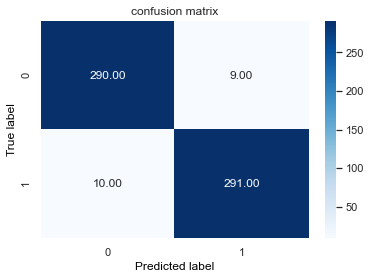

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       299
           1       0.97      0.97      0.97       301

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [121]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')
sns.set(font_scale=1.0)

plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('confusion matrix')
plt.show()

print(metrics.classification_report(test_labels, pr))

In [107]:
from sklearn import svm
cf = svm.SVC()
cf.fit(train_featuresh, train_labels) 
test_pra = cf.predict(test_featuresh) 
    
print('Accuracy of  classifier on training set: {:.2f}'
     .format(cf.score(train_featuresh, train_labels)))
print('Accuracy of  classifier on test set: {:.2f}'
     .format(cf.score( test_featuresh,test_labels)))
print(metrics.accuracy_score(test_labels, test_pra))
print(metrics.classification_report(test_labels, test_pra))

Accuracy of  classifier on training set: 0.98
Accuracy of  classifier on test set: 0.96
0.9566666666666667
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       299
           1       0.97      0.94      0.96       301

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [108]:
model = PassiveAggressiveClassifier(max_iter=5000,C = 0.5, random_state = 2) 
  
# Fitting model  
model.fit(train_featureso, train_labels) 
  
# Making prediction on test set 
test_pred = model.predict(test_featureso) 
  
# Model evaluation 
#print(accuracy_score(test_labels, test_pred))   
print('Accuracy of  classifier on training set: {:.2f}'
     .format(model.score(train_featureso, train_labels)))
print('Accuracy of  classifier on test set: {:.2f}'
     .format(model.score( test_featureso,test_labels)))
print(metrics.accuracy_score(test_labels, test_pred))
cm = confusion_matrix(test_labels, test_pred)
cm

Accuracy of  classifier on training set: 0.99
Accuracy of  classifier on test set: 0.96
0.965


array([[293,   6],
       [ 15, 286]], dtype=int64)

In [109]:
print(metrics.classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       299
           1       0.98      0.95      0.96       301

    accuracy                           0.96       600
   macro avg       0.97      0.97      0.96       600
weighted avg       0.97      0.96      0.96       600



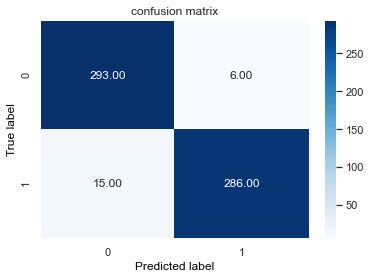

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       299
           1       0.98      0.95      0.96       301

    accuracy                           0.96       600
   macro avg       0.97      0.97      0.96       600
weighted avg       0.97      0.96      0.96       600



In [110]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')
sns.set(font_scale=1.0)

plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('confusion matrix')
plt.show()

print(metrics.classification_report(test_labels, test_pred))

In [118]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train_featuresx, train_labels)

#Predict the response for test dataset
y_prad = clf.predict(test_featuresx)
print('Accuracy of  classifier on training set: {:.2f}'
     .format(clf.score(train_featuresx, train_labels)))
print('Accuracy of  classifier on test set: {:.2f}'
     .format(clf.score( test_featuresx,test_labels)))

print(metrics.accuracy_score(test_labels, y_prad))
cm = confusion_matrix(test_labels, y_prad)
cm


Accuracy of  classifier on training set: 1.00
Accuracy of  classifier on test set: 0.92
0.9216666666666666


array([[278,  21],
       [ 26, 275]], dtype=int64)

In [119]:
print(metrics.classification_report(test_labels,y_prad))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       299
           1       0.93      0.91      0.92       301

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



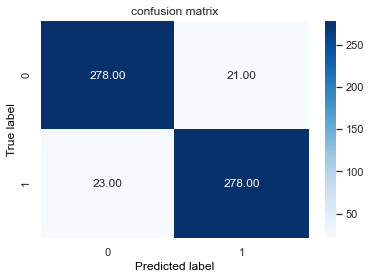

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       299
           1       0.93      0.92      0.93       301

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [70]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')
sns.set(font_scale=1.0)

plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('confusion matrix')
plt.show()

print(metrics.classification_report(test_labels, y_prad))

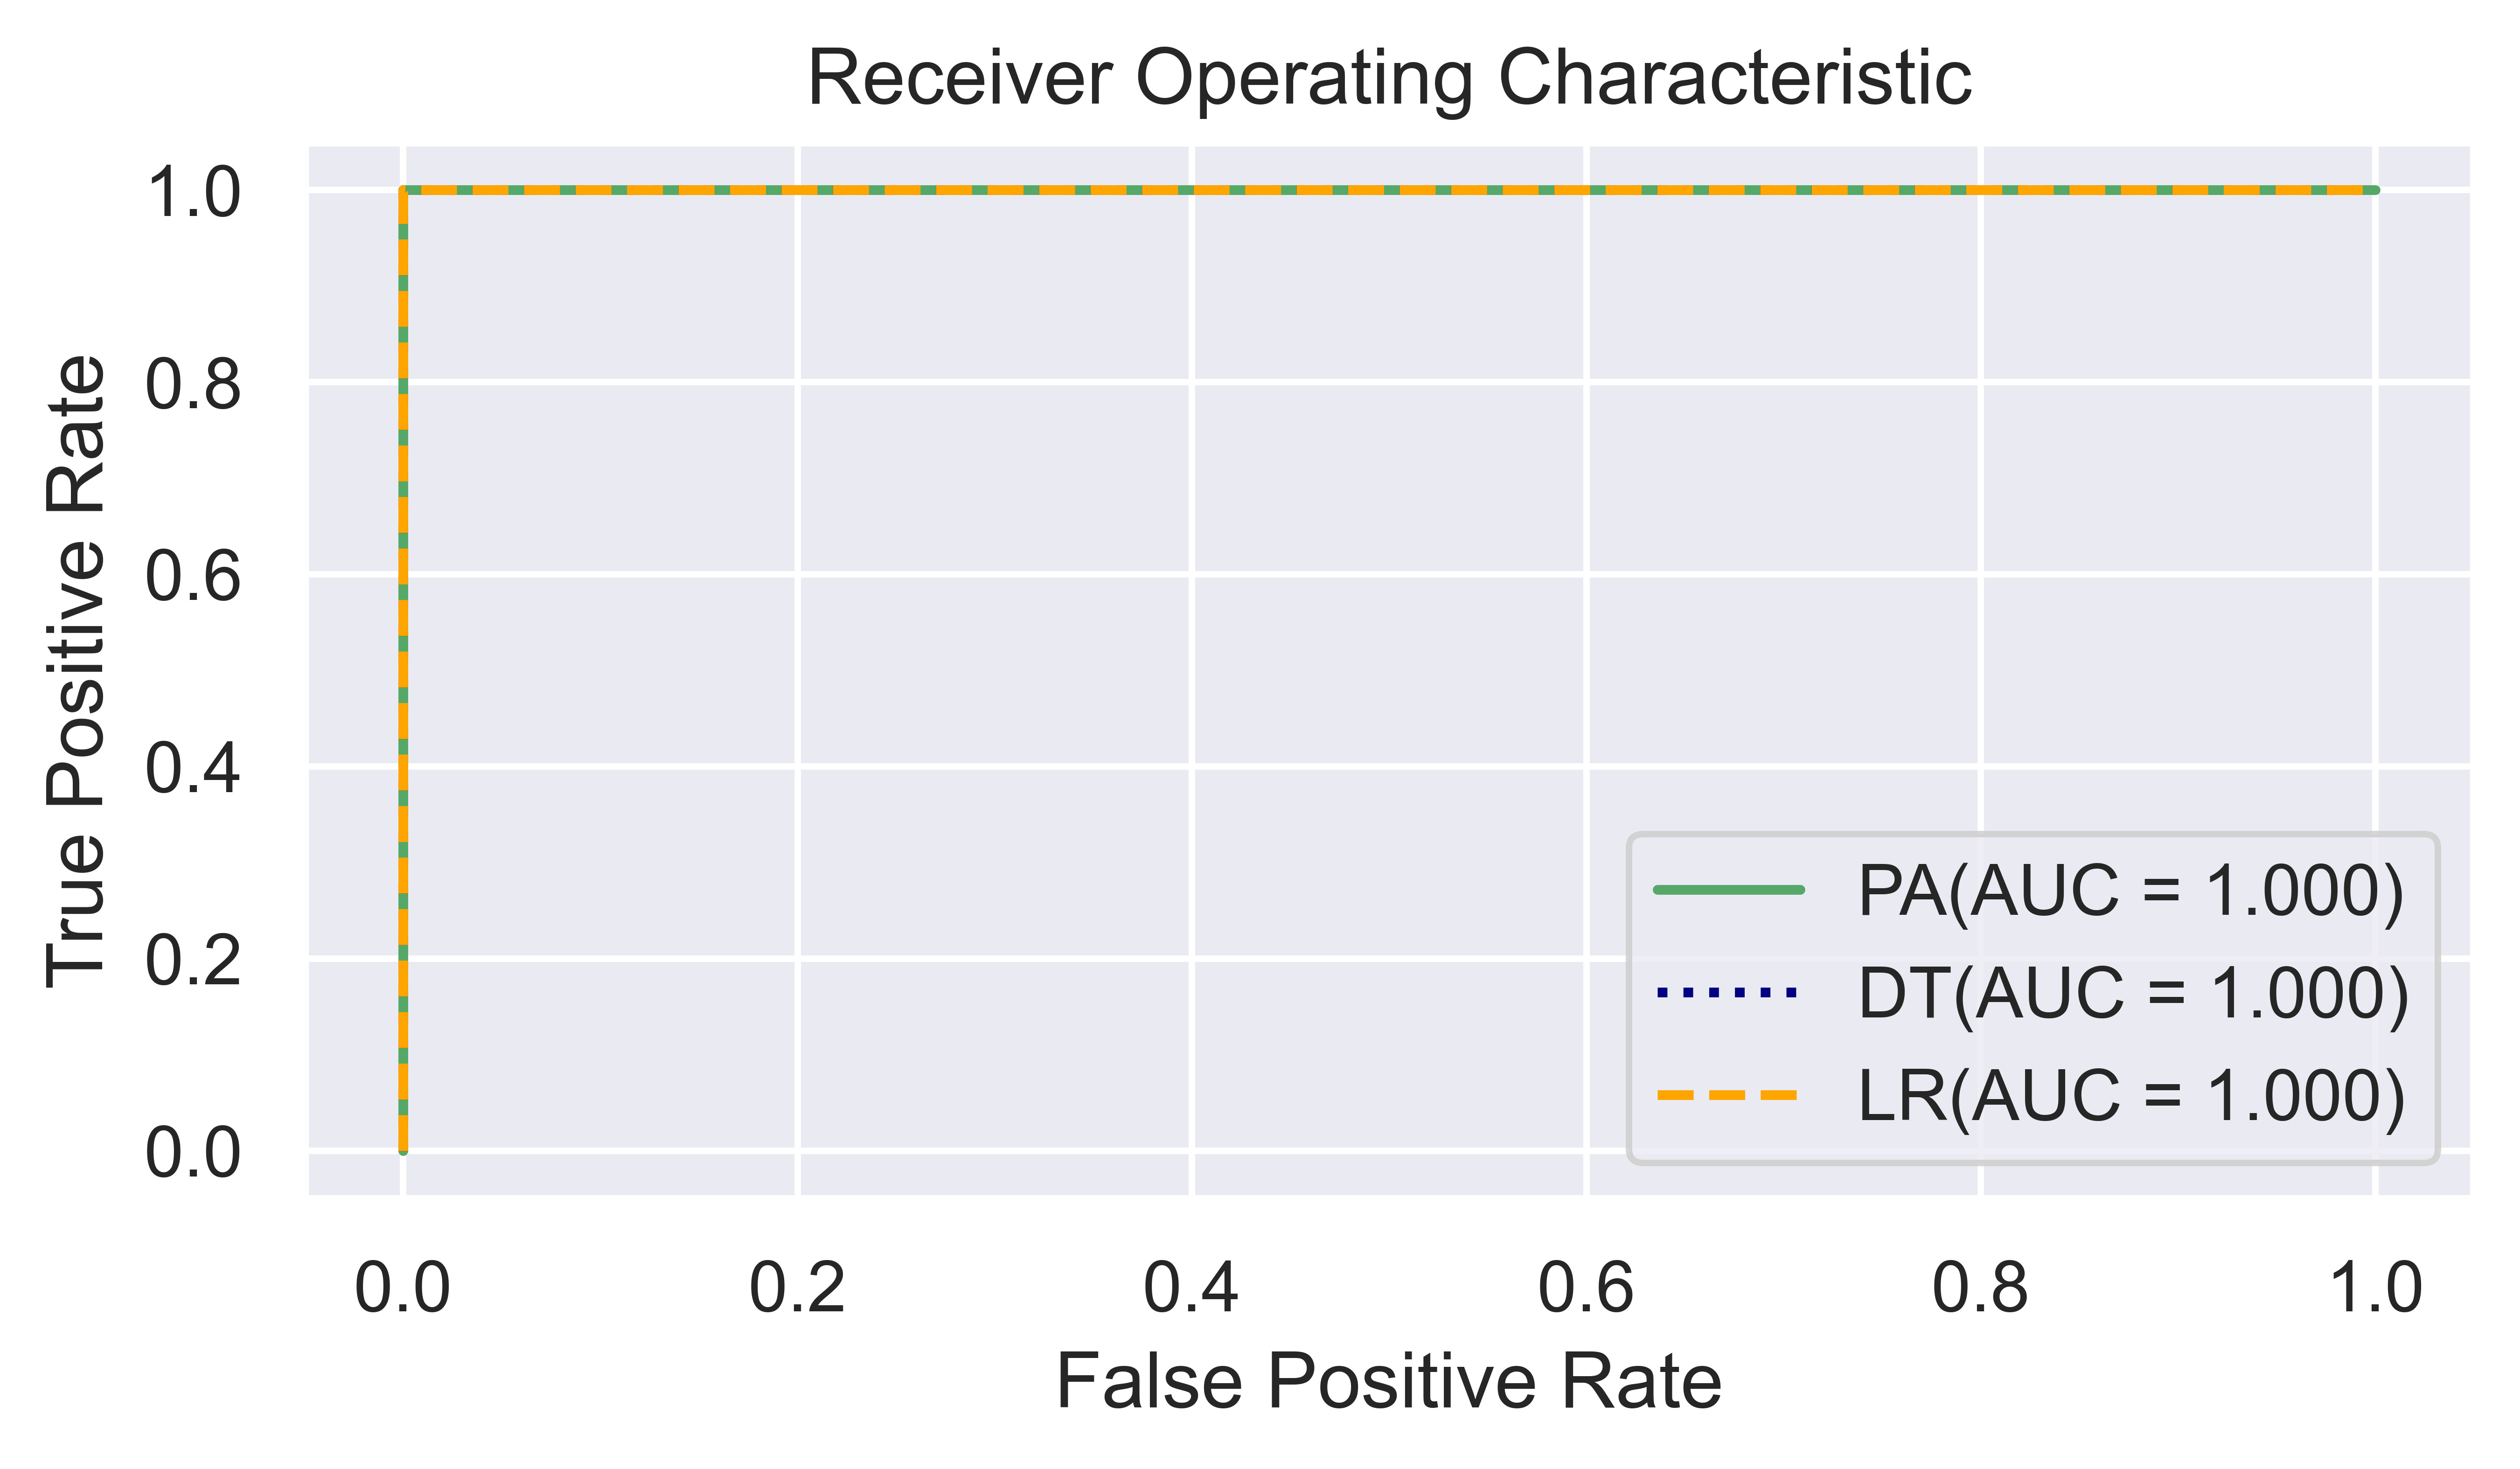

In [82]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model._predict_proba_lr(test_featuresx)
probss = clf.predict_proba(test_featuresx)
probsy = logreg.predict_proba(test_featuresx)
preds= probs[:,1]
predy= probss[:,1]
predx= probsy[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
fprr, tprr, threshold = metrics.roc_curve(test_labels, predy)
fprs, tprs, threshold = metrics.roc_curve(test_labels, predx)
roc_auc = metrics.auc(fpr, tpr)
roc_aucc = metrics.auc(fprr, tprr)
roc_au = metrics.auc(fprs, tprs)
# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3),dpi=1000)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g',linestyle='solid', label = 'PA(AUC = %0.3f)' % roc_auc)
plt.plot(fprr, tprr, 'navy',linestyle='dotted', label = 'DT(AUC = %0.3f)' % roc_aucc)
plt.plot(fprs, tprs, 'orange',linestyle='--', label = 'LR(AUC = %0.3f)' % roc_au)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()